In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os, subprocess
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

Using TensorFlow backend.


In [2]:
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
frames_loc = "/Users/sharingan/Documents/IEMOCAP_vid_frames/"
emotion_classes = ['ang', 'hap', 'neu'] 

In [3]:
# generator returns an iterator whose each iteration returns a tuple with following two parts
# batch of images of target_size size of selected color_mode ---- in our case 32 images of size 50x50 with 1 channel(grayscale)
# ground truth in term of one hot encoding ----- in our case 32 one hot encodings
def generate_train(directory):
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(directory,
                                                        target_size=(50, 50),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        color_mode = 'grayscale')
    return train_generator

def generate_test(directory):
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_generator = test_datagen.flow_from_directory(directory,
                                                            target_size=(50, 50),
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            color_mode='grayscale')
    return test_generator

In [80]:
kf = KFold(n_splits=len(sessions))
kf = kf.split(sessions)
# Calculating class weights
for train, test in kf:
    y_train = []
    for t in train:
        train_generator = generate_train(frames_loc + sessions[t])
        y_train.extend(train_generator.classes)
        break
    break

Found 35437 images belonging to 3 classes.


(50, 50)
(32, 3)


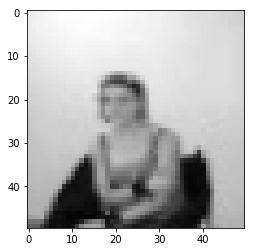

In [64]:
filenames = iter(train_generator.filenames)

for x, y in train_generator:
    image = x[0]
    image = image.reshape(50,50)
    print image.shape
    print y.shape
    plt.imshow(image, cmap='gray')
    break

In [69]:
filenames = train_generator.filenames
f = iter(filenames)

ang/Ses02F_script01_1_F019_104.jpg


In [86]:
# Finding the minimum number of frames
dataset_dir = '/Users/sharingan/Documents/IEMOCAP_full_release/'
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
vid_loc = '/dialog/avi/DivX/'

datafile_loc = '/dialog/EmoEvaluation/'
segment_loc = "/Users/sharingan/Documents/IEMOCAP_vid_clips/"
min_time = float("inf")

for sess in sessions:
    # extract names of all videos
    vid_full_names = [x for x in os.listdir(dataset_dir + sess + vid_loc) if x[-3:] == 'avi']
    all_names = [x[:-4] for x in vid_full_names]
    print "------------------------------------------------"
    print sess
    
    for name in all_names:
        txt_file_name = name + '.txt'
        vid_name = name + '.avi'

        # location of video file and text file
        vid_file = dataset_dir + sess + vid_loc + vid_name
        txt_file = dataset_dir + sess + datafile_loc + txt_file_name
        out_loc = segment_loc + sess + '/' # + respective_emotion_folder
        
        with open(txt_file) as f:
            data = f.readlines()
        data = iter(data)
        try:
            for line in data:
                if line != '\n':
                    continue;
                line = next(data)
                start_time = line.split()[0][1:]
                end_time = line.split()[2][:-1]
                segment_name = line.split()[3]
                emotion = line.split()[4]
                if emotion != 'xxx':
                    running_time = float(end_time)-float(start_time)
                    min_time = min(min_time, running_time)
                    cmd = 'ffmpeg -i ' + vid_file + ' -ss ' + start_time + ' -acodec copy -to '+ end_time + ' ' + out_loc + emotion + '/' + segment_name + '.avi'
        except(StopIteration):
            None
    print min_time

print min_time


# all_vid_names = subprocess.check_output(["ls",original_vid_loc]).split()
# all_names = [x[:-4] for x in all_vid_names]
# min_time = float("inf")

# for name in all_names:
#     txt_file_name = name + '.txt'
#     with open(datafile_loc + txt_file_name) as f:
#         data = f.readlines()
#     data = iter(data)
#     try:
#         for line in data:
#             if line != '\n':
#                 continue;
#             line = next(data)
#             start_time = line.split()[0][1:]
#             end_time = line.split()[2][:-1]
# #             print  float(end_time)-float(start_time)3
#             min_time = min(min_time, float(end_time)-float(start_time))
#     except(StopIteration):
#         None
        
max_frames = int(min_time*30)
print max_frames

------------------------------------------------
Session1
0.8425
------------------------------------------------
Session2
0.7322
------------------------------------------------
Session3
0.585
------------------------------------------------
Session4
0.585
------------------------------------------------
Session5
0.585
0.585
17
